In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score ,train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import VotingClassifier,RandomForestClassifier
from collections import Counter
import matplotlib.pyplot as plt
from datetime import date
from matplotlib import style
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
plt.style.use('ggplot')
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')
%matplotlib notebook

In [4]:
def label_setter(df):
    print(df)
    if abs(df['High']-df['Price'])<abs(df['Price']-df['Low']):
        return 1
    else :
        return 0

In [5]:
def source():
    crude_data=pd.read_csv('crude.csv',thousands=',')
    inven_data=pd.read_csv('inventory_crude.csv',index_col=0)
    crude_data.drop(columns={'Vol.','Change %'},inplace=True)
    crude_data.Date = pd.to_datetime(crude_data.Date)
    inven_data.Date=pd.to_datetime(inven_data.Date)
    inven_data=inven_data.iloc[::-1]
    #inven_data.set_index('Date',inplace=True)
    inven_data.dropna(inplace=True)
    crude_data=crude_data[::-1]
    crude_data.set_index('Date',inplace=True)
    inven_data.set_index('Date',inplace=True)
    return crude_data,inven_data


In [6]:
def preprocessed_data():
    crude,inventory=source()
    final_df=pd.merge(crude,inventory,how='inner',left_index=True,right_index=True)
    return final_df

In [13]:
def plotting():
    df=preprocessed_data()
    df.index=pd.to_datetime(df.index)

#df_ohlc=df['Price'].resample('1d').ohlc()
    df_inventory=df['Actual'].resample('1d').sum()


    df.index=df.index.map(mdates.date2num)

    %matplotlib notebook
    ax1=plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
    ax2=plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1,sharex=ax1)
    ax1.xaxis_date()
    candlestick_ohlc(ax1,df[['Open','High','Low','Price']].reset_index().values,width=2,colorup='g');
    ax2.bar(df_inventory.index.map(mdates.date2num),df_inventory.values)
    plt.title(' Crude Oil Graph')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    
    plt.show()

<IPython.core.display.Javascript object>


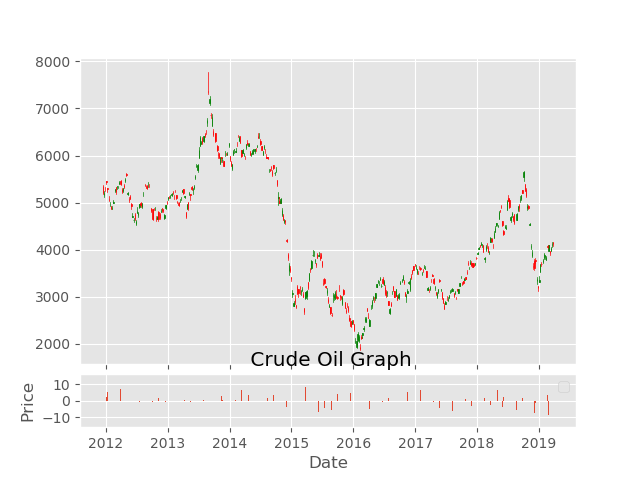

No handles with labels found to put in legend.


In [14]:
plotting()